# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(48, 48)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |               25247 |
+---------------------+---------------------+
|            取引回数 |                  48 |
+---------------------+---------------------+
|            開始日時 | 2020-04-21 00:43:33 |
+---------------------+---------------------+
|            終了日時 | 2020-04-21 07:11:59 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 06:28:26 |
+---------------------+---------------------+
|       取引単位[BTC] |              0.0055 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+----------+
| 開始[JPY]   |    10207 |
+-------------+----------+
| 終了[JPY]   |    10090 |
+-------------+----------+
| 利益[JPY]   |     -117 |
+-------------+----------+
| 開始[BTC]   | 0.021879 |
+-------------+----------+
| 終了[B

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-04-21 02:47:24,buy,4091.993,sell,4080.483,-11.510
2020-04-21 02:47:40,sell,4085.389,buy,4081.533,3.856
2020-04-21 02:47:42,sell,4087.061,buy,4078.503,8.558
2020-04-21 02:47:47,buy,4082.995,sell,4072.183,-10.812
2020-04-21 02:47:57,sell,4078.729,buy,4075.181,3.548
2020-04-21 02:48:02,buy,4079.998,sell,4074.609,-5.389
2020-04-21 02:48:07,sell,4085.812,buy,4081.654,4.158
2020-04-21 02:48:26,buy,4076.997,sell,4070.374,-6.623
2020-04-21 02:48:42,sell,4077.903,buy,4075.313,2.590


In [12]:
round(sum(profit_df.profit), 3)

-117.255

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(25247, 25247)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

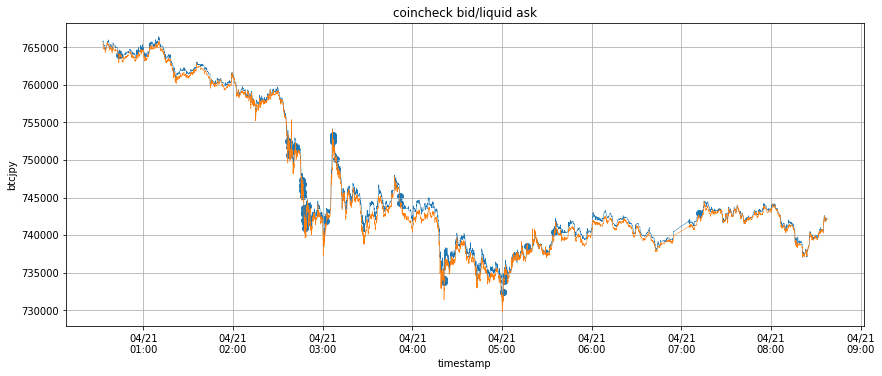

In [16]:
fig1

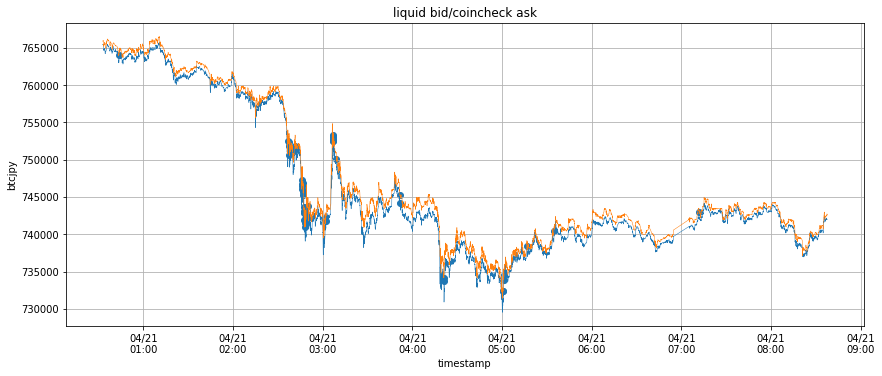

In [17]:
fig2